In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Defina el perceptrón 2
class Perceptron:
    """  Alfa: Es la tasa de aprendizaje
         n_iter: Cantidad de comparaciones con el dataset.
         w_: Pesos
         errors_: Error estimado
    """
    def __init__(self, Alfa=0.1, n_iter=10):
        self.A = Alfa
        self.n_iter = n_iter
 
    def Optimizar_pesos(self, X, y):
        """ X:  array like, forma = [n_samples, n_features]
                Vectores de entrenamiento donde n_samples es el número de muestras y
                n_features es el número de carácteristicas de cada muestra.
            y:  array-like, forma = [n_samples].
                Valores de destino
        """
        #Cree el vector de pesos w_i (Iniciado en 0 de longitud X)
        self.w_ = np.zeros(1 + X.shape[1])
        #Cree un vector para estimar el margen de error
        self.errors_ = []
 
        for _ in range(self.n_iter):
            errors = 0
            #xi es el valor de la entrada en una iteración
            #target es el valor a predecir
            for xi, target in zip(X, y):
                actualizacion = self.A * (target - self.predict(xi))
                self.w_[1:] += actualizacion * xi
                self.w_[0] += actualizacion
                #Convierta en entero si valor diferente de 0.0
                errors += int(actualizacion != 0.0)
            self.errors_.append(errors)
        return self
 
    def predict(self, X):
        """Devolver clase usando función escalón de Heaviside (Activación).
        phi(z) = 1 si z >= theta; -1 en otro caso
        """
        phi = np.where(self.net_input(X) >= 0.0, 1, -1)
        return phi
 
    def net_input(self, X):
        """Calcular el valor z (net input)"""
        # z = w · x + theta
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        return z

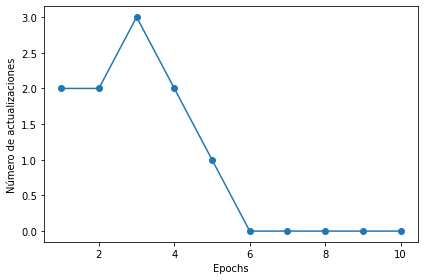

Theta: -0.4
W: [-0.68  1.82]
X: [Largo tallo, Largo pétalo]
z = W · X
phi(z) = 1 si z &gt;= theta; -1 c.o.c


In [3]:
#Definición de la función principal
if __name__ == '__main__':
    # Cargue el dataset
    df = pd.read_csv("iris.data", header=None)
    # Extraer las caracteristicas de interes.
    X = df.iloc[0:100, [0, 2]].values
    # Seleccionar Setosa y Versicolor.
    y = df.iloc[0:100, 4].values
    y = np.where(y == 'Iris-setosa', -1, 1)
    # Inicialice el perceptron
    percep = Perceptron(Alfa=0.1, n_iter=10)
    # Entrene el perceptrón X e y
    percep.Optimizar_pesos(X, y)
    # Grafique el numero de errores por iteración
    plt.plot(range(1, len(percep.errors_) + 1), percep.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Número de actualizaciones')
    plt.tight_layout()
    plt.show()
    #Otras características
    print("Theta: " + str(percep.w_[0])) 
    print("W: " + str(percep.w_[1:]))
    print("X: [Largo tallo, Largo pétalo]")
    print("z = W · X")
    print("phi(z) = 1 si z &gt;= theta; -1 c.o.c")